In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Train.csv")

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10999, 12)


,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [2]:
slice_warehouse_A = df[df['Warehouse_block']=='A']
slice_warehouse_A.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
14,15,A,Flight,4,3,152,3,low,M,43,1009,1
20,21,A,Ship,3,3,161,2,medium,F,38,1521,1
26,27,A,Ship,4,1,172,3,high,F,24,1066,1


In [3]:
dice_data = df[(df['Warehouse_block']=='A') &
               (df['Mode_of_Shipment']=='Flight') &
               (df['Product_importance']=='high')]

dice_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
140,141,A,Flight,4,4,264,3,high,M,59,2020,1
824,825,A,Flight,3,1,142,2,high,M,18,1428,1
830,831,A,Flight,4,4,201,3,high,F,7,2644,1
956,957,A,Flight,4,1,208,7,high,F,65,2674,1
1112,1113,A,Flight,5,1,222,3,high,M,21,2351,1


In [4]:
rollup_warehouse = df.groupby('Warehouse_block').agg({
    'Cost_of_the_Product':'mean',
    'Discount_offered':'mean',
    'Weight_in_gms':'mean',
    'Reached.on.Time_Y.N':'mean'
})

rollup_warehouse

,Cost_of_the_Product,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Warehouse_block,,,,
A,208.767594,13.222586,3615.448991,0.586470
B,212.159302,13.187125,3635.701037,0.602291
C,211.191489,13.399891,3641.331151,0.596836
D,210.907852,13.093784,3628.846783,0.597601
F,209.077196,13.668031,3641.387616,0.598472


In [5]:
pd.pivot_table(
    df,
    values='Cost_of_the_Product',
    index='Warehouse_block',
    columns='Reached.on.Time_Y.N',
    aggfunc='mean'
)

Reached.on.Time_Y.N,0,1
Warehouse_block,,
A,214.216359,204.925581
B,216.736626,209.136775
C,214.654939,208.851920
D,214.563686,208.446168
F,213.424592,206.160438


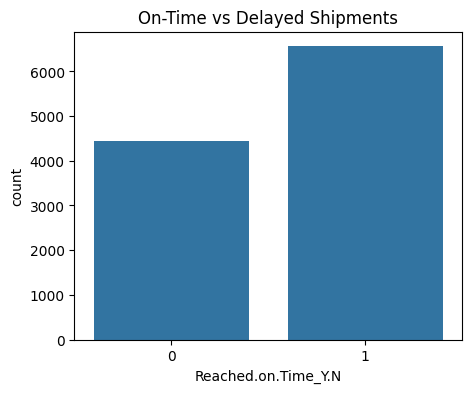

In [6]:
plt.figure(figsize=(5,4))
sns.countplot(x='Reached.on.Time_Y.N', data=df)
plt.title('On-Time vs Delayed Shipments')
plt.show()

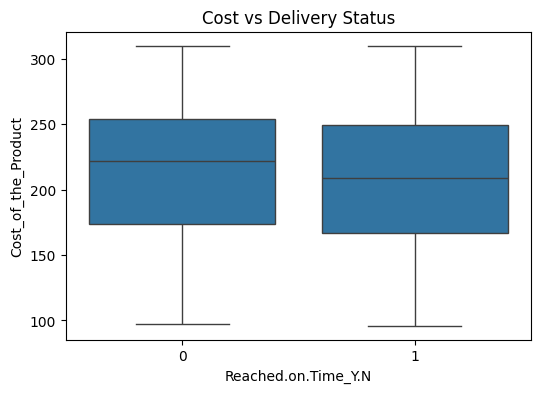

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Reached.on.Time_Y.N', y='Cost_of_the_Product', data=df)
plt.title('Cost vs Delivery Status')
plt.show()

In [8]:

drill_warehouse_mode = df.groupby(
    ['Warehouse_block','Mode_of_Shipment']
)['Reached.on.Time_Y.N'].mean().reset_index()

drill_warehouse_mode

,Warehouse_block,Mode_of_Shipment,Reached.on.Time_Y.N
0,A,Flight,0.585859
1,A,Road,0.571429
2,A,Ship,0.590177
3,B,Flight,0.597973
4,B,Road,0.585034
5,B,Ship,0.607401
6,C,Flight,0.623729
7,C,Road,0.574830
8,C,Ship,0.595659
9,D,Flight,0.599327


In [9]:
dice_problem_orders = df[
    (df['Cost_of_the_Product'] > df['Cost_of_the_Product'].mean()) &
    (df['Weight_in_gms'] > df['Weight_in_gms'].mean()) &
    (df['Reached.on.Time_Y.N'] == 0)
]

dice_problem_orders.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
3136,3137,C,Road,3,3,219,3,low,M,4,5956,0
3138,3139,D,Road,4,5,225,4,medium,M,5,4622,0
3140,3141,A,Road,3,3,256,4,medium,M,3,4732,0
3143,3144,F,Road,3,3,253,3,medium,M,7,5085,0
3147,3148,B,Flight,4,2,272,3,high,F,6,4559,0


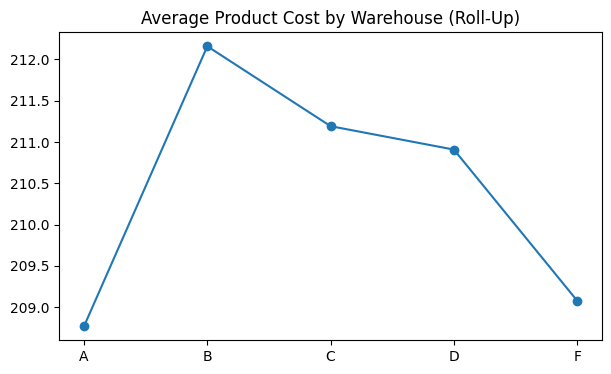

In [10]:
warehouse_cost = df.groupby('Warehouse_block')['Cost_of_the_Product'].mean()

plt.figure(figsize=(7,4))
plt.plot(warehouse_cost.index, warehouse_cost.values, marker='o')
plt.title("Average Product Cost by Warehouse (Roll-Up)")
plt.show()